# Task 3

This notebook analyzes one year of sales data from a pizza restaurant.

The datasets used:
- Orders
- Order details
- Pizzas
- Pizzas Types

All datasets were merged into a single dataframe before analysis.

In [41]:
# importing python libraries

import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Loading the datasets

orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin1')

orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [43]:
# Merging all tables

df = order_details.merge(orders, on='order_id')\
                  .merge(pizzas, on='pizza_id')\
                  .merge(pizza_types, on='pizza_type_id')

df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [44]:
# Creating datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Creating revenue column
df['revenue'] = df['quantity'] * df['price']

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  object        
 5   time              48620 non-null  object        
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  datetime          48620 non-null  datetime64[ns]
 13  revenue           48620 non-null  float64       
dtypes: datetime64[ns](1), 

In [45]:
# Total revenue

total_revenue = df["revenue"].sum()
print("Total Revenue is", total_revenue)

Total Revenue is 817860.05


In [46]:
# Total quantity

total_quantity = df["quantity"].sum()
print("Total Quantity Sold is", total_quantity)

Total Quantity Sold is 49574


In [47]:
# Total Orders

total_orders = df["order_id"].nunique()
print("Total Orders is", total_orders)

Total Orders is 21350


In [48]:
# Average pizza price

average_price = df["price"].mean()
print("Average pizza price is", average_price)

Average pizza price is 16.494132044426163


In [49]:
# Peak hours of sales

df["hour"] = df["datetime"].dt.hour

peak_hours = df.groupby("hour")["revenue"].sum().sort_values(ascending=False)
print(peak_hours.head())

hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
Name: revenue, dtype: float64


weekday
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64


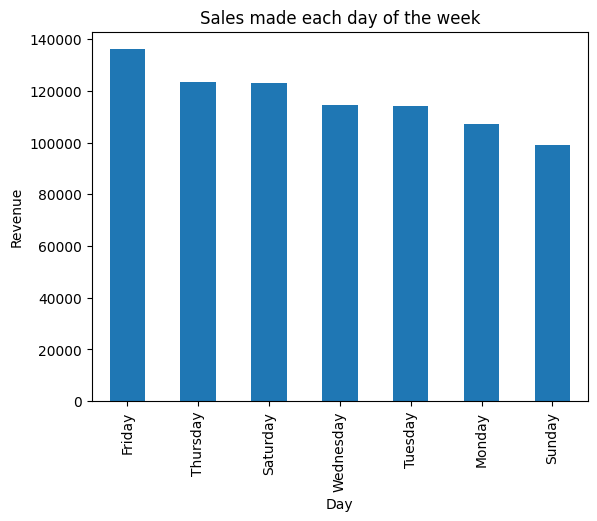

In [50]:
# Sales made each day of the week

df["weekday"] = df["datetime"].dt.day_name()

sales_by_weekday = df.groupby("weekday")["revenue"].sum().sort_values(ascending=False)

print(sales_by_weekday)

sales_by_weekday.plot(kind="bar")
plt.title("Sales made each day of the week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


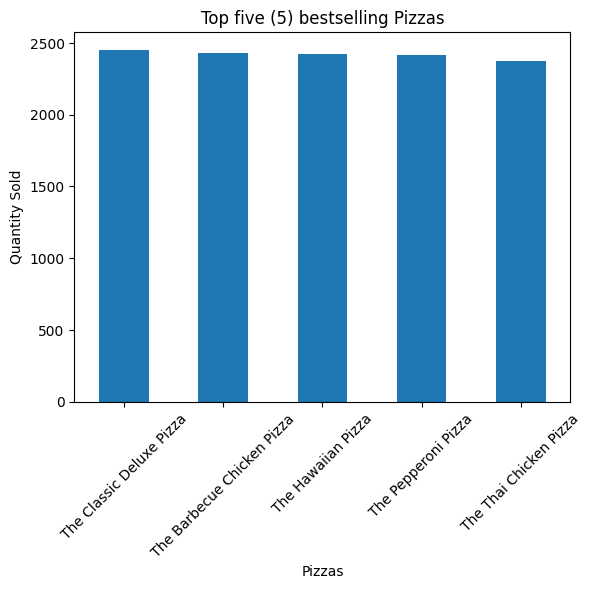

In [51]:
# Top five bestselling pizzas

top5_pizzas = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head()

print(top5_pizzas)

top5_pizzas.plot(kind="bar")
plt.title("Top five (5) bestselling Pizzas")
plt.xlabel("Pizzas")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

month
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Name: revenue, dtype: float64


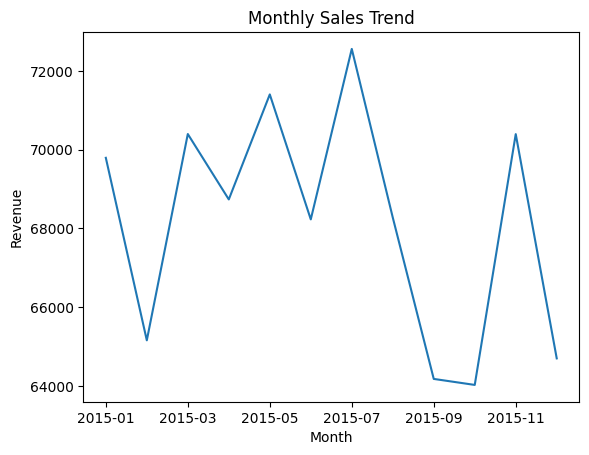

In [52]:
# Monthly sales trend

df["month"] = df["datetime"].dt.to_period("M").astype(str)

monthly_sales = df.groupby("month")["revenue"].sum()

print(monthly_sales)


monthly_sales.plot(kind="line")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [53]:
# Low performing pizzas

bottom_pizzas = df.groupby("name")["quantity"].sum().sort_values().head()

print(bottom_pizzas)

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


**Conclusions on performance of the pizzas**

- Lunch hours (12 - 1 PM) generate the highest revenue.
- End of the week (especially Friday) drives the most sales.
- Some pizzas consistently underperform and may need promotion or removal.